# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Sanchez, Jezreel John C.\
_Student No._: 2019-06919\
_Section_: HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 30 November 2023; 10:45 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Jezreel John C. Sanchez

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

Single-step Crank-Nicolson:
 Number of spatial slices: 1000
 Time step used: 1e-18 [s]
 Psi(t=0) vector: [0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
 0.00000000e+000+0.j 0.00000000e+000+0.j 

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


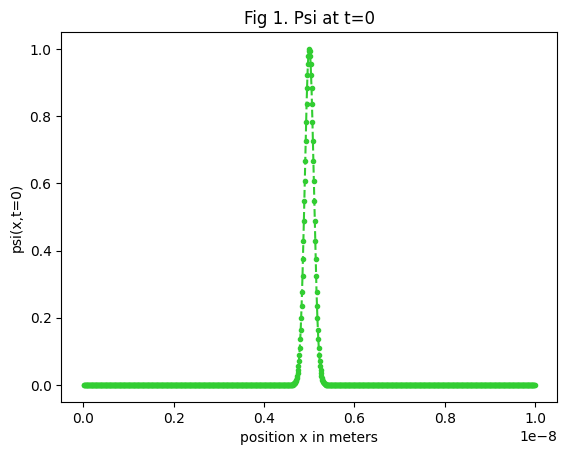

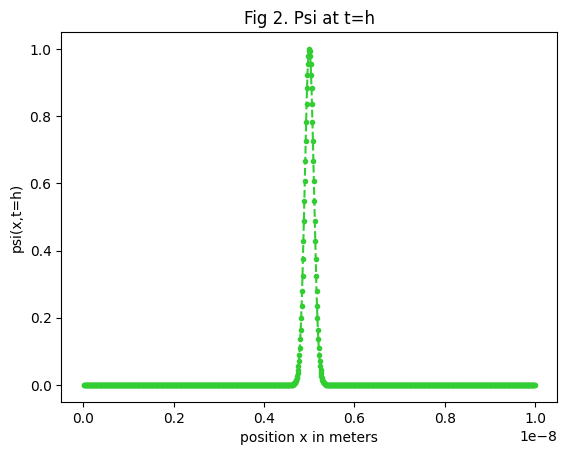

In [40]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt

# Defining constants
M = 9.109e-31
L = 1e-8
x_0 = L/2
sigma = 1e-10
kappa = 5e10

h_bar = (6.26e-34)/(2*np.pi)

# Defining wavefunction at t=0. I put t=0 here for emphasis only; it doesn't do anything for the function
def psi(x,t=0, x_0=x_0, sigma=sigma, kappa=kappa):
  return (np.exp(-((x-x_0)**2)/(2*(sigma)**2)))*np.exp(1j*kappa*t)

# Spacial slices N and spacial interval a
N = 1000
a = L/N

# Time step h
h = 1e-18

# b1 and b2
b1 = 1-h*((1j*h_bar)/(2*M*(a**2)))
b2 = h*((1j*h_bar)/(4*M*(a**2)))

# Tridiagonal matrix creator
# Our default N is N-1 since we want the A and B matrices to only cover the interior points
def create_B (b1=b1, b2=b2, N=N-1):
  B = np.zeros([N,N],complex)

  # Loop that makes the main diagonal values b1
  for i in range(N):
    B[i][i] = b1

  # Loop that makes the entries adjacent to the diagonal b2. We use N-1
  #since letting this be N as with the previous loop makes i go out of bounds
  for i in range(N-1):
    B[i+1][i] = b2 # makes the entry to the right of the main diagonal b2
    B[i][i+1] = b2 # makes the entry below the main diagonal b2

  return B

# Initializing matrix B
B = create_B(N=N-1)

# a1 and a2
a1 = 1 + h*((1j*h_bar)/(2*M*(a)**2))
a2 = -h*((1j*h_bar)/(4*M*(a)**2))

# Initializing matrix A
A = create_B(b1=a1, b2=a2, N=N-1)


# This creates psi_vector

def make_psi_vector(x_initial=0, x_final=L, size=N-1):
  """
  The boundaries are found at x_initial and x_final. The array this makes only
  includes the interior points, so x_initial and x_final are not included.
  size determines how many spacial slices are to be used (same as number of time steps)
  """

  psi_array = np.empty(size, complex)

  # This loop plugs in the appropriate values for each element of the psi array
  # The i+1 in the RHS is there so that only the interior points (excluding boundaries)
  #will be included inside the array
  for i in range(size):
    psi_array[i] = psi(x=x_initial+(i+1)*a)

  return psi_array

# Making psi vector at t=0
psi_vector_0 = make_psi_vector()

# Initializing vector v
v = np.matmul(B,psi_vector_0)

# We can now solve for x in the matrix equation Ax = v (w/c is the same as Apsi(t+h) = Bpsi(t))
# Here, x = psi(x, t+h); x is the wave function after one time step h
# In the multi-step Crank-Nicolson later, we'll use this idea to create multiple time steps for psi

x = np.linalg.solve(A, v)

print(f"Single-step Crank-Nicolson:\n Number of spatial slices: {N}\n Time step used: {h} [s]\n Psi(t=0) vector: {psi_vector_0}\n Psi(t=h): {x}\n")

#----------------------------------------------------------------------------------------
# PLOTTING

x_array = np.linspace(start=a, stop=(N-1)*a, num=N-1)

# Reusing old function from Module 4
def plot_settings(figure, axes, x,y, xlabel="x", ylabel="y", color="blue", title="", \
                  use_xlimit=False, use_ylimit=False, xlim1=0, xlim2=100, ylim1=-10, ylim2=10, \
                  marker="o", markersize=5, linestyle="--", label="", **kwargs):
  """
  Plots specified arrays.

  xlabel and ylabel sets the labels of the respective axes.
  use_xlimit/use_ylimit toggles whether or not plt.xlim()/plt.ylim would be used, where xlim1/ylim1 and
  xlim2/ylim2 are its parameters.
  """
  axes.plot(x,y, marker=marker, markersize=markersize, linestyle=linestyle, color=color, label=label)

  plt.title(title)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)

  # These if statements are for incase we want to change the limits of the graph
  if use_xlimit == True:
   plt.xlim(xlim1, xlim2)
   if use_ylimit == True:
     plt.ylim(ylim1, ylim2)

  if use_ylimit == True:
    plt.ylim(ylim1, ylim2)
    if use_xlimit == True:
      plt.xlim(xlim1, xlim2)

# Initializing fig1 for psi at t=0
fig1, ax1 = plt.subplots()

plot_settings(fig1,ax1,x_array,psi_vector_0,xlabel="position x in meters", ylabel="psi(x,t=0)", \
              color="limegreen", title="Fig 1. Psi at t=0", markersize=3)

# Initializing fig2 for psi at t=h
fig2, ax2 = plt.subplots()

plot_settings(fig2,ax2,x_array,x,xlabel="position x in meters", ylabel="psi(x,t=h)", \
              color="limegreen", title="Fig 2. Psi at t=h", markersize=3)

plt.show()


Not much difference can be observed from the single time step. Although the form of \\(\psi\\) at \\(t=0\\) is Gaussian, the relatively small standard deviation \\(\sigma\\) makes it look more like a Dirac-delta function.

Multi-step Crank-Nicolson Method:
 Number of spatial slices: 1000
 Time step used: 1e-18 [s]
 Start time: 0.0 [s]
 End time: 9.900000000000001e-17 [s]
 Psi(t=9.900000000000001e-17) vector: [ 1.74808771e-165-3.55592729e-165j -6.89601683e-165-1.02612127e-164j
 -4.01984072e-164+6.22757555e-165j -3.87707210e-164+1.28466431e-163j
  3.26535205e-163+2.97902465e-163j  1.34862310e-162-5.46246165e-163j
  2.94123286e-163-4.77758980e-162j -1.37504378e-161-7.65102839e-162j
 -4.21684902e-161+2.99023737e-161j  2.88213845e-161+1.67243927e-160j
  5.35767894e-160+1.51427502e-160j  1.20560446e-159-1.37042692e-159j
 -2.34676685e-159-5.49994116e-159j -1.95584530e-158-8.34383417e-160j
 -3.00564264e-158+5.65523472e-158j  1.24439509e-157+1.68375001e-157j
  6.71576973e-157-1.29647371e-157j  5.63222523e-157-2.16065197e-156j
 -5.56808329e-156-4.69601715e-156j -2.16362619e-155+9.78117521e-156j
 -1.61975124e-156+7.73298120e-155j  2.24880207e-154+1.13215176e-154j
  6.47459451e-154-5.01458935e-154j -5.64424092e-154-

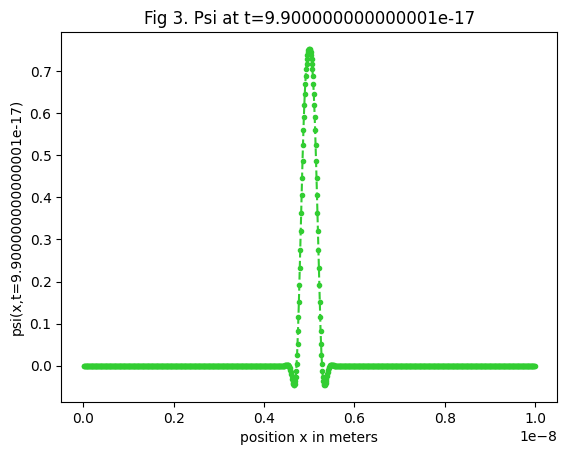

In [41]:
# Here we do the multi-step Crank-Nicolson Method

# Here's a summary of the important intitialized variables from the previous code block
M = 9.109e-31
L = 1e-8
x_0 = L/2
sigma = 1e-10
kappa = 5e10
h_bar = (6.26e-34)/(2*np.pi)

#Spacial slices N and spacial interval a
N = 1000
a = L/N

#Time step h
h = 1e-18

#b1 and b2
b1 = 1-h*((1j*h_bar)/(2*M*(a**2)))
b2 = h*((1j*h_bar)/(4*M*(a**2)))

#a1 and a2
a1 = 1 + h*((1j*h_bar)/(2*M*(a)**2))
a2 = -h*((1j*h_bar)/(4*M*(a)**2))

#psi_vector
psi_vector_0 = make_psi_vector()

#Initializing matrix A (We'll be reusing this a lot in the C_N_Method function)
A = create_B(b1=a1, b2=a2, N=N-1)


# Let's define our Crank-Nicolson Method function
def C_N_Method(psi_vector_initial=psi_vector_0, size=N-1, h=h, steps=1, _b1=b1, _b2=b2, _A=A, \
               use_t_array=False, **kwargs):
  """
  Uses Crank-Nicolson Method to solve PDE's

  psi_vector_initial is the wavefunction at t=0

  size is the number of spatial slices

  h is the time-step

  steps determines how many times the method is repeated and how many psi(t) are
  genereated

  b1 are the main diagonal entries of B

  b2 are the entries of B adjacent to the main diagonal

  If use_t_array=True, returns the associated time array instead
  """
  # Conditional for producing time array t_array instead
  if use_t_array == True:
    # Initialize time array
    t_array = []

    # creating time array
    for i in range(steps):
      t_array.append(i*h)

    return t_array

  # Initializing mega_psi_array, which contains each psi_array for each time t
  mega_psi_array = []

  # Initializing v array. We wont do np.matmul(B,psi) here since we'll be repeating
  #this computation a lot this time around, so we'll straight-up compute v.
  v = np.empty([size],complex)

  # This loop makes v
  for i in range(size):
    # We put these conditionals to make sure that i returns the correct psi entry
    #at i=0
    if i==0:
      v[i] = _b1*psi_vector_initial[i] + _b2*(psi_vector_initial[i+1])
    elif i<size-1:
      v[i] =  _b1*psi_vector_initial[i] + _b2*(psi_vector_initial[i+1] + psi_vector_initial[i-1])
    elif i==size-1:
      v[i] = _b1*psi_vector_initial[i] + _b2*(psi_vector_initial[i-1])

  # Here, we get psi(0+h), or how the wave function will look like at time h
  psi_array = np.linalg.solve(_A,v)

  # We append the result to the list of all wavefunctions within the specified number of time steps
  mega_psi_array.append(psi_array)

  if steps == 1:
    return psi_array

  else:
    # This is the main loop that does the repetitions of Crank-Nicolson for each time step desired
    #  We have steps-1 since we already iterated once in the initialization phase of the code
    for step in range(steps-1):
      # We let the previously computed psi_array be the next psi_vector_initial
      # We make a new v based on the new psi
      for i in range(size):
      # We put these conditionals to make sure that i returns the correct psi entry
      #at i=0
        if i==0:
          v[i] = _b1*psi_array[i] + _b2*(psi_array[i+1])
        elif i<size-1:
          v[i] =  _b1*psi_array[i] + _b2*(psi_array[i+1] + psi_array[i-1])
        elif i==size-1:
          v[i] = _b1*psi_array[i] + _b2*(psi_array[i-1])

      # We get the new psi_array for time t+h by solving the matrix equation like last time
      psi_array = np.linalg.solve(_A,v)

      # Again, we append this new value to mega_psi_array
      mega_psi_array.append(psi_array)

    return mega_psi_array

steps = 100
# This contains all the time evolution of the wavefunction for the specified # of steps.
mega_psi_array = C_N_Method(size=N-1, steps=steps)

# This contains the time associated with with each wavefunction of mega_psi_array
t_array = C_N_Method(size=N-1, steps=steps, use_t_array=True)


print(f"Multi-step Crank-Nicolson Method:\n Number of spatial slices: {N}\n Time step used: {h} [s]\n Start time: {t_array[0]} [s]\n End time: {t_array[-1]} [s]\n Psi(t={t_array[-1]}) vector: {mega_psi_array[-1]}\n")

#-----------------------------------------------------------------------------------------------------

# PLOTTING

# Initializing fig3 for psi at t=t_final
fig3, ax3 = plt.subplots()

plot_settings(fig3,ax3,x_array,mega_psi_array[-1],xlabel="position x in meters", ylabel=f"psi(x,t={t_array[-1]})", \
              color="limegreen", title=f"Fig 3. Psi at t={t_array[-1]}", markersize=3)

plt.show()

#---------------------------------------------------------------------------------------------------------




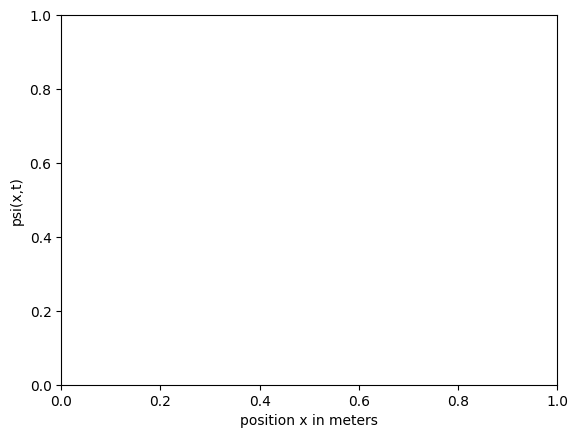

In [42]:

# ANIMATION

import matplotlib.animation as animation

steps = 2
# This contains all the time evolution of the wavefunction for the specified # of steps.
mega_psi_array = C_N_Method(size=N-1, steps=steps)

# This contains the time associated with with each wavefunction of mega_psi_array
t_array = C_N_Method(size=N-1, steps=steps, use_t_array=True)

# Initializing fig where we do animations
fig4, ax4 = plt.subplots()
ax4.set_xlabel("position x in meters"); ax4.set_ylabel("psi(x,t)")

# animation function
def update(i):
    #ax4.clear()
    # Plotting graph
    ax4.plot(x_array, mega_psi_array[i][:], color = "limegreen")



ani = animation.FuncAnimation(fig=fig4, func=update, frames=range(steps))

plt.show()



As we can see in Fig 3, the wavefunction \\(\psi\\) is spreading out and becoming less like the sharply-peaked Dirac-delta-like function we saw at \\(t=0\\). This phenomenon we see is the spreading of a wavepacket in time, which is governed by the Heisenberg Uncertainty Principle:

\\[ \Delta x \Delta p ≥ \frac{\hbar}{2}\\]

If we let \\(\Delta x_{0}\\) be the uncertainty in position at \\(t=0\\) and \\(\Delta p_{0}\\) be the uncertainty in momentum at \\(t=0\\),

\\[ \Delta x_{0} \Delta p_{0} ≥ \frac{\hbar}{2}\\]

At the lower limit of the Uncertainty Principle,

\\[ \Delta x_{0} \Delta p_{0} = \frac{\hbar}{2} ⇒ \Delta p_{0} = \frac{\hbar}{2 \Delta x_{0}}\\]

For the mass of the particle M, the uncertainty in momentum is given by
\\[M(\Delta v(t)) = \Delta p(t)\\]

At \\(t=0\\),
\\[⇒ \Delta v_{0} = \frac{\Delta p_{0}}{M} = \frac{\hbar}{2M \Delta x_{0}}\\]

At some time \\(t > 0\\), the uncertainty in position \\(\Delta x(t)\\) is given by
\\[t(\Delta v(t)) = \Delta x(t)\\]

\\[\boxed{\therefore \Delta x(t) ∝ \frac{\hbar t}{2M \Delta x_{0}}}\\]

We can see from the boxed relation that the spread/uncertainty in position at a some time \\(t\\) increases as time goes on, that is, the wavefunction gets flatter as time goes on. This shows that wavepackets do indeed spread out in time as observed in the our data.

We also see that the uncertainty in position at a later time is inversly proportional to the initial spread. This means that for a Dirac-delta-like function with very small spread, it would take a much greater amount of time for the wavefunction flatten to a similar extent to another wavefunction with less spread in position. This agrees with what we found in Fig 2, where there was barely any change in the wavefunction since the time step is very small.

Hence, we can expect that at \\(t→∞\\), the wavefunction would be completely flat, that is, there is the same probability of finding the particle anywhere.